<a href="https://colab.research.google.com/github/minnjeee/SWcamp_3project_TextMining/blob/main/2_%ED%86%A0%ED%81%B0%ED%99%94_%EB%A0%88%EC%9D%B4%EB%B8%94%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 설치

In [ ]:
!pip install konlpy

# 폰트 환경 설정

--2023-10-25 16:38:35--  https://github.com/byungjooyoo/Dataset/raw/main/NanumGothic.ttf
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/byungjooyoo/Dataset/main/NanumGothic.ttf [following]
--2023-10-25 16:38:36--  https://raw.githubusercontent.com/byungjooyoo/Dataset/main/NanumGothic.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4343844 (4.1M) [application/octet-stream]
Saving to: ‘NanumGothic.ttf.1’

NanumGothic.ttf.1   100%[===================>]   4.14M  11.2MB/s    in 0.4s    

2023-10-25 16:38:37 (11.2 MB/s) - ‘NanumGothic.ttf.1’ saved [4343844/4343844]



<Axes: title={'center': '한글'}>

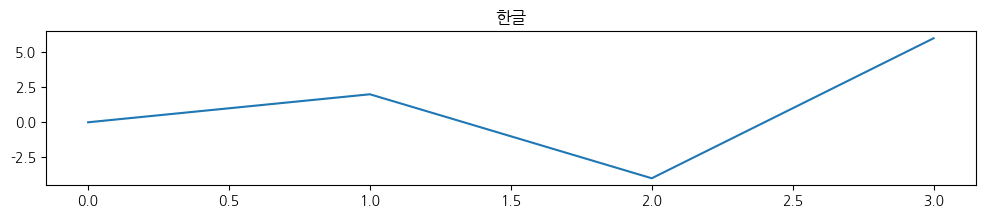

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
!wget https://github.com/byungjooyoo/Dataset/raw/main/NanumGothic.ttf
mpl.font_manager.fontManager.addfont('NanumGothic.ttf')
mpl.rc('font', family='NanumGothic')
plt.rc("axes", unicode_minus=False)

# 한글 폰트 확인하기
import pandas as pd
pd.Series([0,2,-4,6]).plot(title="한글", figsize=(12, 2))

# 라이브러리 임포트

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import math
import pickle

In [ ]:
from konlpy.tag import Okt
from collections import Counter # 빈도 탐색
import nltk

# 전처리된 데이터셋 준비

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SW캠프 데이터 비즈니스 과정/Re:Source/data_pre.csv')
data

,name,star,date,content,utility,g_no,pre
0,최유진,5,2023년 9월 6일,광고는 한판 할때마다 뜨긴하는데 꽤 괜찮은 게임입니다. 돈 모아서 어디쓰나 했더니 ...,98.0,1,광고는 한판 할 때마다 뜨긴 하는데 꽤 괜찮은 게임입니다돈 모아서 어디 쓰나 했더니...
1,김세희,5,2023년 9월 10일,광고봐서 내용만 재밌는 그런게임인줄 알았는데 재밌네요,47.0,1,광고 봐서 내용만 재밌는 그런 게임인 줄 알았는데 재밌네요
2,정희원,5,2023년 10월 2일,너무 재밌고 꾸미는 재미가 있어요!,4.0,1,너무 재밌고 꾸미는 재미가 있어요
3,이지윤,5,2023년 10월 7일,님들도 헤봐용 너무 제밌고 웃께용 👍 따봉,NaN,1,님들도 헤봐용 너무 재밌고 웃께 용 따봉
4,김땅콩,1,2023년 9월 19일,전형적인 양산형 최악의 게임 입니다.,20.0,1,전형적인 양산형 최악의 게임입니다
...,...,...,...,...,...,...,...
38547,강정미,5,2022년 2월 21일,꿀밤,3.0,45,꿀밤
38548,바보,4,2022년 2월 27일,Please reduce ads 😭😭🙄🙁😶,2.0,45,광고를 줄이십시오
38549,byungchul han,5,2022년 8월 7일,회생 후.,0.0,45,회생 후
38550,날아라슈퍼보드팬크레용팝팬,4,2022년 2월 27일,아진짜.,3.0,45,아 진짜


# 토큰화

In [ ]:
!wget https://raw.githubusercontent.com/byungjooyoo/Dataset/main/korean_stopwords.txt

def tokenizing(text) :
  # 형태소 추출
  okt = Okt()
  tokens = okt.pos(text, stem=True, norm=True, join=False)

  # 한 글자 제거
  tokens = [(token,tag) for token,tag in tokens if len(token) > 1]

  # 불용어 사전 생성
  with open('korean_stopwords.txt', 'r') as f: # 다른 사람이 만든 사전에 정의된 불용어 사전
    stop_words = f.read().split("\n")
  s1 = "게임, 다시, 계속, 다른, 정도, 하나, 그냥, 진짜, 정말, 해도, 지금, 갑자기, 때문, 자체, 조금, 수가, 건가, 갈수록, 점점, 자주, 이후, 동안, 거의, 한번, 이번, 바로, 이제, 무슨, 매우, 아예, 여러, 아주, 절대, 가끔, 모든, 예전, 다만, 뭔가, 원래, 위해, 요즘, 제발, 수도, 최근, 하라, 며칠, 무조건, 현재, 제대로, 일단, 이전, 제일, 전혀, 가장, 매번, 그대로, 무엇, 그거, 어디, 하나요, 금방, 여기, 어제, 만큼, 그동안, 거지, 거기, 나름, 잠깐, 완전, 은근, 잘못, 하니, 언제, 도대체, 또한, 거나, 그게, 벌써, 아무, 약간, 항상, 혹시, 관련, 심지어, 사실, 등등, 그때, 굳이, 종종, 게다가, 오히려, 주지, 듭니, 가기, 도저히, 통해, 이틀, 부터, 번은"
  noun_stopword = s1.split(', ') # 내가 새로 추가하는 명사 불용어
  stop_words = stop_words + noun_stopword
  s2 = "이다, 같다, 아니다, 그렇다, 이렇다, 어떻다"
  adjective_stopword = s2.split(', ') # 새로 추가하는 형용사 불용어
  stop_words = stop_words + adjective_stopword
  tokens = [(token,tag) for token,tag in tokens if token not in stop_words]

  return tokens

--2023-10-25 13:53:28--  https://raw.githubusercontent.com/byungjooyoo/Dataset/main/korean_stopwords.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7007 (6.8K) [text/plain]
Saving to: ‘korean_stopwords.txt’

korean_stopwords.tx 100%[===================>]   6.84K  --.-KB/s    in 0s      

2023-10-25 13:53:28 (61.1 MB/s) - ‘korean_stopwords.txt’ saved [7007/7007]



In [ ]:
data['pre'] = data['pre'].astype(str)

In [ ]:
tqdm.pandas()  # tqdm의 pandas 기능을 활성화
data['tok'] = data['pre'].progress_apply(tokenizing)

100%|██████████| 38440/38440 [06:05<00:00, 105.31it/s]
<ipython-input-41-fe2386077b50>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tok'] = data['pre'].progress_apply(tokenizing)


In [ ]:
data

,name,star,date,content,utility,g_no,pre,tok
0,최유진,5,2023년 9월 6일,광고는 한판 할때마다 뜨긴하는데 꽤 괜찮은 게임입니다. 돈 모아서 어디쓰나 했더니 ...,98.0,1,광고는 한판 할 때마다 뜨긴 하는데 꽤 괜찮은 게임입니다돈 모아서 어디 쓰나 했더니...,"[(광고, Noun), (한판, Noun), (하다, Verb), (마다, Josa..."
1,김세희,5,2023년 9월 10일,광고봐서 내용만 재밌는 그런게임인줄 알았는데 재밌네요,47.0,1,광고 봐서 내용만 재밌는 그런 게임인 줄 알았는데 재밌네요,"[(광고, Noun), (보다, Verb), (내용, Noun), (재밌다, Adj..."
2,정희원,5,2023년 10월 2일,너무 재밌고 꾸미는 재미가 있어요!,4.0,1,너무 재밌고 꾸미는 재미가 있어요,"[(너무, Adverb), (재밌다, Adjective), (꾸미다, Verb), ..."
3,이지윤,5,2023년 10월 7일,님들도 헤봐용 너무 제밌고 웃께용 👍 따봉,NaN,1,님들도 헤봐용 너무 재밌고 웃께 용 따봉,"[(님들, Noun), (헤봐용, Noun), (너무, Adverb), (재밌다, ..."
4,김땅콩,1,2023년 9월 19일,전형적인 양산형 최악의 게임 입니다.,20.0,1,전형적인 양산형 최악의 게임입니다,"[(전형, Noun), (양산, Noun), (최악, Noun)]"
...,...,...,...,...,...,...,...,...
38435,강정미,5,2022년 2월 21일,꿀밤,3.0,45,꿀밤,"[(꿀밤, Noun)]"
38436,바보,4,2022년 2월 27일,Please reduce ads 😭😭🙄🙁😶,2.0,45,광고를 줄이십시오,"[(광고, Noun), (줄이다, Verb)]"
38437,byungchul han,5,2022년 8월 7일,회생 후.,0.0,45,회생 후,"[(회생, Noun)]"
38438,날아라슈퍼보드팬크레용팝팬,4,2022년 2월 27일,아진짜.,3.0,45,아 진짜,[]


In [ ]:
# 명사,형용사 토큰만 추출
def no_ad_tokenize(tokens):
  tokens = [token for token,tag in tokens if (tag=="Noun" or tag=="Adjective")] # 명사와 형용사 형태소 추출
  return tokens

# 명사 토큰 추출
def nouns_tokenize(tokens):
  tokens = [token for token,tag in tokens if tag == "Noun"] # 명사 형태소만 추출
  # tokens = [token for token,tag in tokens if (tag=="Noun" or tag=="Adjective")] # 명사와 형용사 형태소 추출
  return tokens

# 모든 토큰 추출
def all_tokenize(tokens):
  tokens = [token for token,tag in tokens]
  return tokens

In [ ]:
data['no_ad'] = data['tok'].progress_apply(no_ad_tokenize)
data['nouns'] = data['tok'].progress_apply(nouns_tokenize)
data['all'] = data['tok'].progress_apply(all_tokenize)
data

100%|██████████| 38440/38440 [00:00<00:00, 157738.61it/s]
<ipython-input-44-69e7a5d1f3e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['no_ad'] = data['tok'].progress_apply(no_ad_tokenize)
100%|██████████| 38440/38440 [00:00<00:00, 185272.83it/s]
<ipython-input-44-69e7a5d1f3e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['nouns'] = data['tok'].progress_apply(nouns_tokenize)
100%|██████████| 38440/38440 [00:00<00:00, 184552.41it/s]
<ipython-input-44-69e7a5d1f3e1>:3: SettingWithCopyWarning:

,name,star,date,content,utility,g_no,pre,tok,no_ad,nouns,all
0,최유진,5,2023년 9월 6일,광고는 한판 할때마다 뜨긴하는데 꽤 괜찮은 게임입니다. 돈 모아서 어디쓰나 했더니 ...,98.0,1,광고는 한판 할 때마다 뜨긴 하는데 꽤 괜찮은 게임입니다돈 모아서 어디 쓰나 했더니...,"[(광고, Noun), (한판, Noun), (하다, Verb), (마다, Josa...","[광고, 한판, 괜찮다, 미기, 상대, 사람, 보기, 저런, 결과, 생각, 시반, ...","[광고, 한판, 미기, 상대, 사람, 보기, 저런, 결과, 생각, 시반, 소리, 고...","[광고, 한판, 하다, 마다, 뜨다, 하다, 괜찮다, 모으다, 쓰다, 하다, 꾸다,..."
1,김세희,5,2023년 9월 10일,광고봐서 내용만 재밌는 그런게임인줄 알았는데 재밌네요,47.0,1,광고 봐서 내용만 재밌는 그런 게임인 줄 알았는데 재밌네요,"[(광고, Noun), (보다, Verb), (내용, Noun), (재밌다, Adj...","[광고, 내용, 재밌다, 재밌다]","[광고, 내용]","[광고, 보다, 내용, 재밌다, 알다, 재밌다]"
2,정희원,5,2023년 10월 2일,너무 재밌고 꾸미는 재미가 있어요!,4.0,1,너무 재밌고 꾸미는 재미가 있어요,"[(너무, Adverb), (재밌다, Adjective), (꾸미다, Verb), ...","[재밌다, 재미]",[재미],"[너무, 재밌다, 꾸미다, 재미]"
3,이지윤,5,2023년 10월 7일,님들도 헤봐용 너무 제밌고 웃께용 👍 따봉,NaN,1,님들도 헤봐용 너무 재밌고 웃께 용 따봉,"[(님들, Noun), (헤봐용, Noun), (너무, Adverb), (재밌다, ...","[님들, 헤봐용, 재밌다]","[님들, 헤봐용]","[님들, 헤봐용, 너무, 재밌다, 따다]"
4,김땅콩,1,2023년 9월 19일,전형적인 양산형 최악의 게임 입니다.,20.0,1,전형적인 양산형 최악의 게임입니다,"[(전형, Noun), (양산, Noun), (최악, Noun)]","[전형, 양산, 최악]","[전형, 양산, 최악]","[전형, 양산, 최악]"
...,...,...,...,...,...,...,...,...,...,...,...
38435,강정미,5,2022년 2월 21일,꿀밤,3.0,45,꿀밤,"[(꿀밤, Noun)]",[꿀밤],[꿀밤],[꿀밤]
38436,바보,4,2022년 2월 27일,Please reduce ads 😭😭🙄🙁😶,2.0,45,광고를 줄이십시오,"[(광고, Noun), (줄이다, Verb)]",[광고],[광고],"[광고, 줄이다]"
38437,byungchul han,5,2022년 8월 7일,회생 후.,0.0,45,회생 후,"[(회생, Noun)]",[회생],[회생],[회생]
38438,날아라슈퍼보드팬크레용팝팬,4,2022년 2월 27일,아진짜.,3.0,45,아 진짜,[],[],[],[]


In [ ]:
data.to_csv('/content/drive/MyDrive/Colab Notebooks/SW캠프 데이터 비즈니스 과정/Re:Source/data_2tok.csv', index=False) # 토큰화된 필드 추가된 df 저장

# 데이터 레이블화

In [ ]:
# 사전에 정의되어 있는 게임 관련 감성 사전
sentiment_dict = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SW캠프 데이터 비즈니스 과정/Re:Source/sd.csv', encoding='cp949')
sentiment_dict

,word,pos,score
0,반짝거리다,Verb,0.325000
1,일정하다,Adjective,0.250000
2,힘없다,Adjective,-0.525000
3,겨루다,Verb,0.225000
4,안이하다,Adjective,-0.375000
...,...,...,...
2444,과격하다,Adjective,-0.075000
2445,추하다,Adjective,-0.250000
2446,닦아지다,Verb,0.055556
2447,부산스럽다,Adjective,-0.200000


In [ ]:
# 감성사전에 새로운 단어,점수 추가
new_row = [{'word': '최고', 'pos': 'Nouns', 'score':0.5},
           {'word': '노잼', 'pos': 'Nouns', 'score':-0.7},
           {'word': '별로', 'pos': 'Nouns', 'score':-0.4},
           {'word': '존잼', 'pos': 'Nouns', 'score':0.7},
           {'word': '개존잼', 'pos': 'Nouns', 'score':0.7},
           {'word': '최악', 'pos': 'Nouns', 'score':-0.5}]
sentiment_dict = sentiment_dict.append(new_row, ignore_index=True)

# 감정사전을 딕셔너리 형태로 변환
sentiment_score = dict(zip(sentiment_dict["word"], sentiment_dict["score"]))

# 각 리뷰의 감정 점수를 계산하는 함수 정의
def calculate_sentiment_score(tokens):
    score = sum([sentiment_score.get(token, 0) for token in tokens])
    return score

# 각 리뷰에 대해 감정 점수를 계산
data["score"] = data["all"].apply(calculate_sentiment_score)
data

<ipython-input-48-ddb2e43bd443>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sentiment_dict = sentiment_dict.append(new_row, ignore_index=True)
<ipython-input-48-ddb2e43bd443>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["score"] = data["all"].apply(calculate_sentiment_score)


,name,star,date,content,utility,g_no,pre,tok,no_ad,nouns,all,score
0,최유진,5,2023년 9월 6일,광고는 한판 할때마다 뜨긴하는데 꽤 괜찮은 게임입니다. 돈 모아서 어디쓰나 했더니 ...,98.0,1,광고는 한판 할 때마다 뜨긴 하는데 꽤 괜찮은 게임입니다돈 모아서 어디 쓰나 했더니...,"[(광고, Noun), (한판, Noun), (하다, Verb), (마다, Josa...","[광고, 한판, 괜찮다, 미기, 상대, 사람, 보기, 저런, 결과, 생각, 시반, ...","[광고, 한판, 미기, 상대, 사람, 보기, 저런, 결과, 생각, 시반, 소리, 고...","[광고, 한판, 하다, 마다, 뜨다, 하다, 괜찮다, 모으다, 쓰다, 하다, 꾸다,...",3.725
1,김세희,5,2023년 9월 10일,광고봐서 내용만 재밌는 그런게임인줄 알았는데 재밌네요,47.0,1,광고 봐서 내용만 재밌는 그런 게임인 줄 알았는데 재밌네요,"[(광고, Noun), (보다, Verb), (내용, Noun), (재밌다, Adj...","[광고, 내용, 재밌다, 재밌다]","[광고, 내용]","[광고, 보다, 내용, 재밌다, 알다, 재밌다]",2.150
2,정희원,5,2023년 10월 2일,너무 재밌고 꾸미는 재미가 있어요!,4.0,1,너무 재밌고 꾸미는 재미가 있어요,"[(너무, Adverb), (재밌다, Adjective), (꾸미다, Verb), ...","[재밌다, 재미]",[재미],"[너무, 재밌다, 꾸미다, 재미]",1.250
3,이지윤,5,2023년 10월 7일,님들도 헤봐용 너무 제밌고 웃께용 👍 따봉,NaN,1,님들도 헤봐용 너무 재밌고 웃께 용 따봉,"[(님들, Noun), (헤봐용, Noun), (너무, Adverb), (재밌다, ...","[님들, 헤봐용, 재밌다]","[님들, 헤봐용]","[님들, 헤봐용, 너무, 재밌다, 따다]",0.850
4,김땅콩,1,2023년 9월 19일,전형적인 양산형 최악의 게임 입니다.,20.0,1,전형적인 양산형 최악의 게임입니다,"[(전형, Noun), (양산, Noun), (최악, Noun)]","[전형, 양산, 최악]","[전형, 양산, 최악]","[전형, 양산, 최악]",-0.500
...,...,...,...,...,...,...,...,...,...,...,...,...
38435,강정미,5,2022년 2월 21일,꿀밤,3.0,45,꿀밤,"[(꿀밤, Noun)]",[꿀밤],[꿀밤],[꿀밤],0.000
38436,바보,4,2022년 2월 27일,Please reduce ads 😭😭🙄🙁😶,2.0,45,광고를 줄이십시오,"[(광고, Noun), (줄이다, Verb)]",[광고],[광고],"[광고, 줄이다]",0.000
38437,byungchul han,5,2022년 8월 7일,회생 후.,0.0,45,회생 후,"[(회생, Noun)]",[회생],[회생],[회생],0.000
38438,날아라슈퍼보드팬크레용팝팬,4,2022년 2월 27일,아진짜.,3.0,45,아 진짜,[],[],[],[],0.000


In [ ]:
data.to_csv('/content/drive/MyDrive/Colab Notebooks/SW캠프 데이터 비즈니스 과정/Re:Source/data_3score.csv', index=False) # 감성점수 필드가 추가된 df 저장

<Axes: >

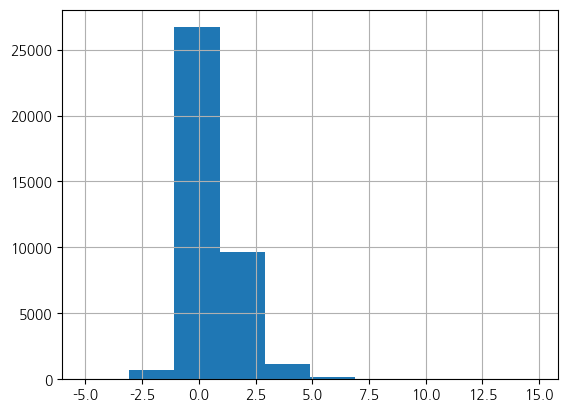

In [ ]:
data['score'].hist()

In [ ]:
# 가중치 설정 : 감정사전 0.7 & 평점 0.3
sentiment_weight = 0.7
star_weight = 0.3

# utility 점수의 중앙값 계산
utility_median = data['utility'].median()

# utility 점수를 사용하여 가중치를 조정하는 함수 정의
def classify_with_weighted_utility(row):
    # utility 점수가 중앙값보다 높은 경우 추가 가중치 부여
    weight = 1.2 if row['utility'] > utility_median else 1

    # 가중치가 부여된 utility 점수와 score 및 star 필드를 결합하여 최종 점수 계산
    weighted_score = (row['score'] * sentiment_weight + row['star'] * star_weight) * weight

    return weighted_score

data['weighted_sentiment'] = data.apply(classify_with_weighted_utility, axis=1)
data

<ipython-input-51-72cf4c329720>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['weighted_sentiment'] = data.apply(classify_with_weighted_utility, axis=1)


,name,star,date,content,utility,g_no,pre,tok,no_ad,nouns,all,score,weighted_sentiment
0,최유진,5,2023년 9월 6일,광고는 한판 할때마다 뜨긴하는데 꽤 괜찮은 게임입니다. 돈 모아서 어디쓰나 했더니 ...,98.0,1,광고는 한판 할 때마다 뜨긴 하는데 꽤 괜찮은 게임입니다돈 모아서 어디 쓰나 했더니...,"[(광고, Noun), (한판, Noun), (하다, Verb), (마다, Josa...","[광고, 한판, 괜찮다, 미기, 상대, 사람, 보기, 저런, 결과, 생각, 시반, ...","[광고, 한판, 미기, 상대, 사람, 보기, 저런, 결과, 생각, 시반, 소리, 고...","[광고, 한판, 하다, 마다, 뜨다, 하다, 괜찮다, 모으다, 쓰다, 하다, 꾸다,...",3.725,4.929
1,김세희,5,2023년 9월 10일,광고봐서 내용만 재밌는 그런게임인줄 알았는데 재밌네요,47.0,1,광고 봐서 내용만 재밌는 그런 게임인 줄 알았는데 재밌네요,"[(광고, Noun), (보다, Verb), (내용, Noun), (재밌다, Adj...","[광고, 내용, 재밌다, 재밌다]","[광고, 내용]","[광고, 보다, 내용, 재밌다, 알다, 재밌다]",2.150,3.606
2,정희원,5,2023년 10월 2일,너무 재밌고 꾸미는 재미가 있어요!,4.0,1,너무 재밌고 꾸미는 재미가 있어요,"[(너무, Adverb), (재밌다, Adjective), (꾸미다, Verb), ...","[재밌다, 재미]",[재미],"[너무, 재밌다, 꾸미다, 재미]",1.250,2.850
3,이지윤,5,2023년 10월 7일,님들도 헤봐용 너무 제밌고 웃께용 👍 따봉,NaN,1,님들도 헤봐용 너무 재밌고 웃께 용 따봉,"[(님들, Noun), (헤봐용, Noun), (너무, Adverb), (재밌다, ...","[님들, 헤봐용, 재밌다]","[님들, 헤봐용]","[님들, 헤봐용, 너무, 재밌다, 따다]",0.850,2.095
4,김땅콩,1,2023년 9월 19일,전형적인 양산형 최악의 게임 입니다.,20.0,1,전형적인 양산형 최악의 게임입니다,"[(전형, Noun), (양산, Noun), (최악, Noun)]","[전형, 양산, 최악]","[전형, 양산, 최악]","[전형, 양산, 최악]",-0.500,-0.060
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38435,강정미,5,2022년 2월 21일,꿀밤,3.0,45,꿀밤,"[(꿀밤, Noun)]",[꿀밤],[꿀밤],[꿀밤],0.000,1.500
38436,바보,4,2022년 2월 27일,Please reduce ads 😭😭🙄🙁😶,2.0,45,광고를 줄이십시오,"[(광고, Noun), (줄이다, Verb)]",[광고],[광고],"[광고, 줄이다]",0.000,1.200
38437,byungchul han,5,2022년 8월 7일,회생 후.,0.0,45,회생 후,"[(회생, Noun)]",[회생],[회생],[회생],0.000,1.500
38438,날아라슈퍼보드팬크레용팝팬,4,2022년 2월 27일,아진짜.,3.0,45,아 진짜,[],[],[],[],0.000,1.200


<Axes: >

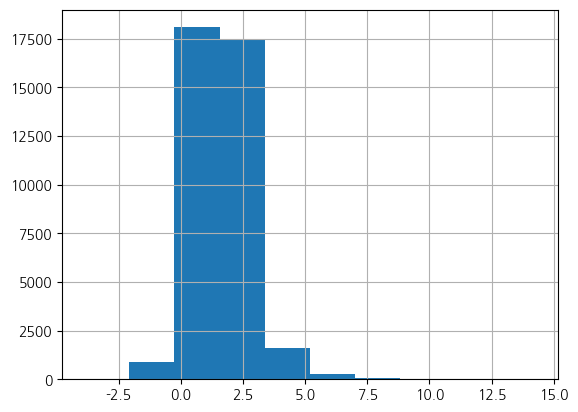

In [ ]:
# 계산된 감성 점수 분포 확인
data['weighted_sentiment'].hist()

In [ ]:
print(data['weighted_sentiment'].mean())
print(data['weighted_sentiment'].median())
## 점수 1.6 기준으로 분류

1.6130658746675461
1.5875


점수 1.6를 기준으로 분류하자

In [ ]:
point = 1.6 # 긍정/부정 분류 기준값
def labeling(score):
  if score > point:
    return 1
  else :
    return 0

data['label'] = data['weighted_sentiment'].apply(labeling)

<ipython-input-56-f2cb84ce53a5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = data['weighted_sentiment'].apply(labeling)


In [ ]:
data['label'].value_counts()

0    19297
1    19143
Name: label, dtype: int64

In [ ]:
data.to_csv('/content/drive/MyDrive/Colab Notebooks/SW캠프 데이터 비즈니스 과정/Re:Source/data_4label.csv', index=False) # 레이블 필드가 추가된 df 저장